In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset into a DataFrame
data = {
    "File": ["ams", "blr", "tor", "fra", "lon", "sgp", "syd", "ny1", "ny2", "ny3", "sfo02", "sfo03"],
    "Total": [1001, 1002, 1002, 1001, 1001, 1001, 1001, 1002, 1001, 1001, 1000, 1001],
    "Good Choices": [652, 626, 637, 521, 838, 597, 687, 550, 537, 606, 542, 583],
    "Bad Choices": [349, 376, 365, 480, 163, 404, 314, 452, 464, 395, 458, 418],
    "Good Choice %": [0.651348651, 0.624750499, 0.635728543, 0.52047952, 0.837162837, 0.596403596, 0.686313686, 0.548902196, 0.536463536, 0.605394605, 0.542, 0.582417582],
    "Bad Choice %": [0.348651349, 0.375249501, 0.364271457, 0.47952048, 0.162837163, 0.403596404, 0.313686314, 0.451097804, 0.463536464, 0.394605395, 0.458, 0.417582418],
    "Median Diff": [0.1065, 6.175, 0.115, 0.052, 0.165, 0.07225, 0.06275, 0.13175, 0.1245, 0.0905, 0.4325, 0.0395],
    "Mean Diff": [12.58730086, 18.9256875, 6.051493151, 2.886936458, 6.48252454, 9.775300743, 8.239565287, 1.692466814, 1.396038793, 1.601970886, 6.922220524, 4.10002512],
    "Max Diff": [282.135, 216.6, 182.6, 282.333, 297.25, 168.5, 180.7325, 223.305, 217.52, 211.595, 156.425, 155.83],
    "Min Diff": [0.0005, 0.002, 0.005, 0.0005, 0.005, 0.001, 0.0005, 0.001, 0.0005, 0.0005, 0.001, 0.0005],
    "Std Dev Diff": [50.65969879, 29.69763147, 15.92599647, 24.14448811, 31.27501874, 17.14976774, 25.48934939, 15.1976555, 11.21336301, 15.09426738, 23.9678706, 18.1239581],
    "25th Percentile Diff": [0.031, 2.7375, 0.065, 0.018875, 0.0525, 0.020375, 0.016, 0.039875, 0.039, 0.034, 0.05025, 0.014625],
    "75th Percentile Diff": [0.2245, 31.34875, 1.45, 0.248625, 2.2775, 20.25, 0.975, 0.224375, 0.186, 0.17525, 1, 0.609875]
}

df = pd.DataFrame(data)


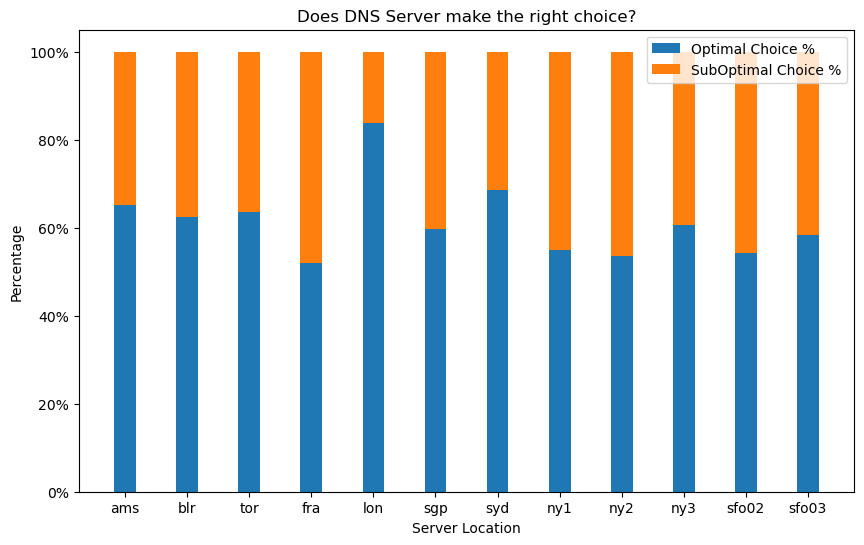

In [14]:
# 1. Stacked Bar Chart for Good Choice % and Bad Choice %
plt.figure(figsize=(10, 6))
x = np.arange(len(df['File']))
width = 0.35

plt.bar(x, df['Good Choice %'], width, label='Optimal Choice %')
plt.bar(x, df['Bad Choice %'], width, bottom=df['Good Choice %'], label='SubOptimal Choice %')

plt.xticks(x, df['File'])
plt.xlabel('Server Location')
plt.ylabel('Percentage')
#format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))
plt.title('Does DNS Server make the right choice?')
plt.legend()
plt.savefig(f"/Users/lillygrella/cdnchoice/Networks-CDNServerChoice/Statistics/Combined/viz/choiceperc_histogram.png")


Story line: While choices seem to be relatively consistent, it is less less about whether the choice was entirely optimal but rather how much better it could be! 

In [14]:

#using sgp_processed_data.csv get summary stats for latency_diff and also plot histogram

# Load the dataset into a DataFrame
#locations = ["sgp", "syd", "ny1", "ny2", "ny3", "sfo02", "sfo03","ams","blr","tor","fra","lon"]
locations = ["sgp","ams","blr","fra"]
for location in locations:
    file = f"/Users/lillygrella/cdnchoice/Networks-CDNServerChoice/Statistics/Combined/{location}_processed_data.csv"
    df = pd.read_csv(file)
    # Get summary statistics for latency_diff
    summary_stats = df['latency_diff'].describe()
    print(summary_stats)

    # Plot histogram for latency_diff
    plt.figure(figsize=(10, 6))
    plt.hist(df['latency_diff'], bins=60, edgecolor='k', alpha=0.7)
    plt.xlabel('Latency Difference (seconds) \n Positive values indicate that the User selected CDN server is faster')
    plt.ylabel('Frequency')
    plt.xlim(-2, 2)
    plt.title('Histogram of Latency Difference between User selected CDN server and DNS selected CDN server \n' + "Location = " + location)
    plt.grid(True)
    plt.savefig(f"/Users/lillygrella/cdnchoice/Networks-CDNServerChoice/Statistics/Combined/viz/solution_analysis/{location}_latency_hist.png")
    plt.close()




count    348.000000
mean       0.117812
std        0.364750
min       -2.192471
25%       -0.001594
50%        0.024267
75%        0.185974
max        2.904776
Name: latency_diff, dtype: float64
count    314.000000
mean       0.085388
std        0.247366
min       -0.489347
25%       -0.001507
50%        0.002472
75%        0.040633
max        1.355121
Name: latency_diff, dtype: float64
count    346.000000
mean       0.102554
std        0.361474
min       -2.095690
25%       -0.000637
50%        0.041210
75%        0.181384
max        2.817074
Name: latency_diff, dtype: float64
count    459.000000
mean       0.031670
std        0.154124
min       -0.752069
25%       -0.002413
50%        0.001545
75%        0.010294
max        1.272412
Name: latency_diff, dtype: float64
